<a href="https://colab.research.google.com/github/keerthana-narra/Airline-passenger-reviews/blob/main/N_Sai_Keerthana_Reddy_Capstone_3_Airline_Referal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement -
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.



## Loading data and Importing libraries



In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_palette('Set2')

import datetime as dt
import dateutil

import importlib


In [ ]:
missing_values = ['N/a', 'na', 'np-nan']

In [ ]:
#Reading data
data = pd.read_excel("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/capstone projects/capstone-3/Copy of data_airline_reviews.xlsx", na_values= missing_values)

## Understanding data

In [ ]:
#Shape of dataset
data.shape

(131895, 17)

In [ ]:
# Columns present in the dataset
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

Feature descriptions briefly as follows:

airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

reviewdate: Date of the Review customer review: Review of the customers in free text format

aircraft: Type of the aircraft

travellertype: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight date flown: Flight date

seatcomfort: Rated between 1-5

cabin service: Rated between 1-5

foodbev: Rated between 1-5 entertainment: Rated between 1-5

groundservice: Rated between 1-5

valueformoney: Rated between 1-5

recommended: Binary, target variable.

In [ ]:
#Acessing top 5 rows
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Describing data
data.describe()



,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Checking for null values
data.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

There are more number of null values in the data set. Cleaning of data becomes very important.

## Cleaning data

In [ ]:
# Copy data to airline_data data frame
airline_data = data.copy()



### Droping rows

In [ ]:
# dropping rows if the entire row is null
airline_data.dropna(how = 'all',inplace = True)

In [ ]:
print(" Total no.of rows in given data ", data.shape[0])
print("No.of rows with null values in all columns", data.shape[0] - airline_data.shape[0])
print("% of rows without complete null values", (airline_data.shape[0]/data.shape[0])*100)

 Total no.of rows in given data  131895
No.of rows with null values in all columns 65948
% of rows without complete null values 49.99962091057281


In [ ]:
# Removing columns that are not required
airline_data.drop(columns = ['aircraft','author'],inplace = True) 

In [ ]:
# Renaming columns
airline_data.rename(columns={'overall':'review_score', 'customer_review':'review_text'}, inplace=True)


In [ ]:
airline_data.shape

(65947, 15)

That means 50% of given data is not at all required.

In [ ]:
# Checking for null values
airline_data.isnull().sum()

airline                0
review_score        1930
review_date            0
review_text            0
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

### Finding and droping duplicates

In [ ]:
# Checking the presence of duplicated data
airline_data[airline_data.duplicated(keep =False)].head()


,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2173,Turkish Airlines,8.0,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2183,Turkish Airlines,8.0,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2215,Turkish Airlines,1.0,24th February 2015,BKK-IST-ARN on A330 and then A321. Flight from...,NaN,Business Class,NaN,NaN,5.0,3.0,4.0,4.0,NaN,1.0,no
2221,Turkish Airlines,1.0,24th February 2015,BKK-IST-ARN on A330 and then A321. Flight from...,NaN,Business Class,NaN,NaN,5.0,3.0,4.0,4.0,NaN,1.0,no
2257,Turkish Airlines,1.0,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no


We dont need to know the name of the person. Aircraft is dropped because most of column is null value and it cant be filled.

In [ ]:
# Conforming the presence of duplicated data
airline_data[airline_data['review_text']== airline_data.loc[2257,:]['review_text']]


,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2257,Turkish Airlines,1.0,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no
2263,Turkish Airlines,1.0,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no


In [ ]:
#Dropping the duplicates by keeping the first occurence
airline_data = airline_data.drop_duplicates(keep= 'first')


In [ ]:
airline_data[['review_date','date_flown']].dtypes


review_date    object
date_flown     object
dtype: object

In [ ]:
airline_data.isnull().sum()

airline                0
review_score        1782
review_date            0
review_text            0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

Now we need fill the missing values. 

In [ ]:
def scaled_feature(feature_to_be_scaled):
  '''scaling entire column by multiplying by 2 so that all ratings are given out of 10'''
  airline_data[feature_to_be_scaled] = airline_data[feature_to_be_scaled]*2
  

In [ ]:
scaled_feature('seat_comfort')
scaled_feature('cabin_service')
scaled_feature('food_bev')
scaled_feature('entertainment')
scaled_feature('ground_service')
scaled_feature('value_for_money')



In [ ]:
airline_data.head(2)
                  

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,8.0,2.0,2.0,2.0,2.0,2.0,no


### Feature Engineering

Filling review columns
For filling review score take average of seat_comfort, cabin_service, food_bev, entertainment, ground_service
And for filling take seat_comfort, cabin_service, food_bev, entertainment, ground_service missing value fill with review **score**

####Filling review score

In [ ]:
x = airline_data.drop(columns = 'review_score')
x['avg'] = round(x.mean(axis=1))

In [ ]:
airline_data['review_score'].fillna(value= x['avg'],inplace = True)

#### Filling other rating columns

In [ ]:
airline_data['seat_comfort'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['cabin_service'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['food_bev'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['entertainment'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['ground_service'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['value_for_money'].fillna(value= airline_data['review_score'],inplace = True)


In [ ]:
airline_data.isnull().sum()

airline                0
review_score         143
review_date            0
review_text            0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort         143
cabin_service        143
food_bev             143
entertainment        143
ground_service       143
value_for_money      143
recommended         1422
dtype: int64

In [ ]:
# Droping with null values in all rating columns
airline_data.dropna(subset= ['review_score'],inplace = True)

In [ ]:
# re-ordering the index as rows are removed
airline_data.reset_index(drop=True,inplace = True)


In [ ]:
airline_data.tail(2)

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
61038,Ukraine International,4.0,4th May 2008,Kiev-Vienna. Check in was slow but after that ...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,no
61039,Ukraine International,3.0,2nd August 2007,VIE-ODS Business class. B737-500 either leased...,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,no


In [75]:
airline_data['recommended'] = airline_data['recommended'].map(
                   {'yes':1 ,'no':0})
  

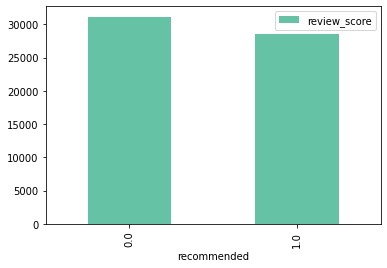

In [115]:
x = airline_data[['review_score','recommended']]
x.groupby(['recommended']).count().plot.bar(stacked = True) 

In [113]:
x.groupby(['recommended']).count()

,review_score
recommended,
0.0,31144
1.0,28492


#### Handling dates

In [ ]:
def date_timestamp(df_ , date_col):

  if (isinstance(df_[date_col],dt.datetime)):
    date_timestamp = df_[date_col]
  else:
    date_timestamp = dateutil.parser.parse(df_[date_col])
  return date_timestamp



In [ ]:
airline_data['review_date'] = airline_data.apply(lambda x: date_timestamp(x, 'review_date'), axis=1)